In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
books=pd.read_csv('book.csv')

In [5]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
# using apriori for determing support of itemsets (with min_support=0.1)
book_itemset = apriori(books, min_support=0.1, use_colnames=True)
book_itemset

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [7]:
#Rules with min confidence of 0.5
confi=association_rules(book_itemset,metric='confidence',min_threshold=0.5)
confi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [8]:
#Finding Association Rule with threshold of 0.8
rules=association_rules(book_itemset,metric='lift',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [9]:
# Sorting the association rules with heighest lift ratio for top 10
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [10]:
r=rules[rules.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [11]:
l=r.pivot('antecedents','consequents','lift')
l.head()

consequents,(YouthBks),(ChildBks),(CookBks),"(DoItYBks, GeogBks)","(ChildBks, GeogBks)","(GeogBks, CookBks)","(ChildBks, ArtBks)","(ArtBks, CookBks)","(ChildBks, RefBks)","(RefBks, CookBks)",...,"(ArtBks, GeogBks)","(YouthBks, CookBks)","(ChildBks, YouthBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, CookBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(ChildBks),1.576044,NaN,1.404179,1.86449,NaN,1.835989,NaN,1.790745,NaN,1.899004,...,1.891253,1.882497,NaN,NaN,1.670264,1.594028,1.669725,1.542511,1.84082,NaN
(YouthBks),NaN,1.576044,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
"(DoItYBks, GeogBks)",NaN,1.864490,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, CookBks)",NaN,1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'YouthBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks', 'GeogBks'})"),
  Text(4.5, 0, "frozenset({'ChildBks', 'GeogBks'})"),
  Text(5.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(6.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'ArtBks', 'CookBks'})"),
  Text(8.5, 0, "frozenset({'ChildBks', 'RefBks'})"),
  Text(9.5, 0, "frozenset({'RefBks', 'CookBks'})"),
  Text(10.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(12.5, 0, "frozenset({'ArtBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(14.5, 0, "frozenset({'ChildBks', 'YouthBks'})"),
  Text(15.5, 0, "frozenset({'ItalCook'})"),
  Text(16.5, 0, "frozenset({'Geo

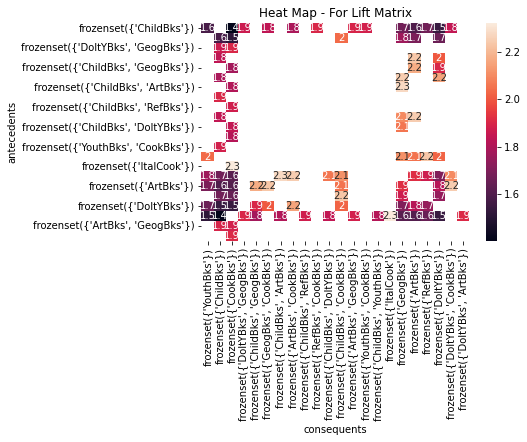

In [12]:
 # Vizualising rules with Heatmap for lift ratio
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)



Text(0.5, 1.0, 'support vs confidence')

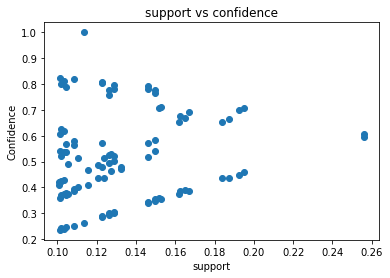

In [13]:
# Scatter plot for the associatioin rules with their confidence vs support 
sup=r['support']
con=r['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

In [14]:
book_itemset2 = apriori(books, min_support=0.16, use_colnames=True)
book_itemset2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [15]:
rules2 = association_rules(book_itemset2, metric="lift", min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
9,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074


In [16]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
9,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074


In [17]:
book2=books[:100]
book2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,0,0,0,0
96,1,1,0,0,0,0,0,0,0,0,0
97,1,0,1,0,0,0,1,1,0,0,0
98,1,1,1,1,0,0,1,0,0,0,0


In [18]:
book_itemset3 = apriori(book2, min_support=0.15, use_colnames=True)
book_itemset3

,support,itemsets
0,0.48,(ChildBks)
1,0.25,(YouthBks)
2,0.47,(CookBks)
3,0.29,(DoItYBks)
4,0.16,(RefBks)
5,0.23,(ArtBks)
6,0.34,(GeogBks)
7,0.18,"(ChildBks, YouthBks)"
8,0.29,"(ChildBks, CookBks)"
9,0.18,"(ChildBks, DoItYBks)"


In [19]:
rules3 = association_rules(book_itemset3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
1,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
2,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
3,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
7,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
8,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391
9,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444


In [20]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
1,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
2,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
3,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
7,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
8,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391
9,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'YouthBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks', 'GeogBks'})"),
  Text(4.5, 0, "frozenset({'ChildBks', 'GeogBks'})"),
  Text(5.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(6.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'ArtBks', 'CookBks'})"),
  Text(8.5, 0, "frozenset({'ChildBks', 'RefBks'})"),
  Text(9.5, 0, "frozenset({'RefBks', 'CookBks'})"),
  Text(10.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(12.5, 0, "frozenset({'ArtBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(14.5, 0, "frozenset({'ChildBks', 'YouthBks'})"),
  Text(15.5, 0, "frozenset({'ItalCook'})"),
  Text(16.5, 0, "frozenset({'Geo

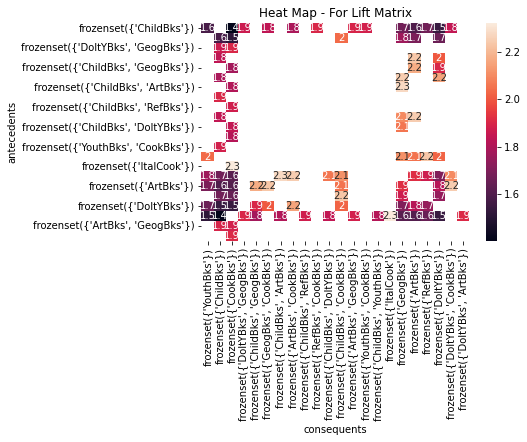

In [21]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)